In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup


web_url = "https://www.imdb.com/search/title/?groups=top_1000&start={}&ref_=adv_nxt"
movie_details = []

# loop through 50 pages to get details of 2,500 movies
for page in range(1, 2501, 50):
    response = requests.get(web_url.format(page))
    soup = BeautifulSoup(response.content, 'html.parser')
    movies = soup.findAll('div', class_='lister-item-content')
    
    for movie in movies:
        title = movie.a.string
        year = movie.find('span', class_='lister-item-year').text
        imdb_rating = float(movie.find('strong').text)
        num_votes = int(movie.find('span', attrs={'name': 'nv'})['data-value'])
        
        # Extract genre
        genre = movie.find('span', class_='genre')
        genre = genre.text.strip() if genre else 'N/A'
        
        # Extract details of director and stars
        director_stars = movie.find('p', class_='').text.strip().split('|')
        director = director_stars[0].replace('Director:', '').strip() if len(director_stars) > 1 else 'N/A'
        stars = director_stars[-1].replace('Stars:', '').strip() if 'Stars:' in director_stars[-1] else 'N/A'
        
        movie_details.append([title, year, imdb_rating, num_votes, genre, director, stars])

# Convert to DataFrame and save to Excel
df = pd.DataFrame(movie_details, columns=['Title', 'Year', 'IMDb Rating', 'Number of Votes', 'Genre', 'Director', 'Stars'])
df.to_excel('IMDb_Top_2500_Movies_Detailed.xlsx', index=False)


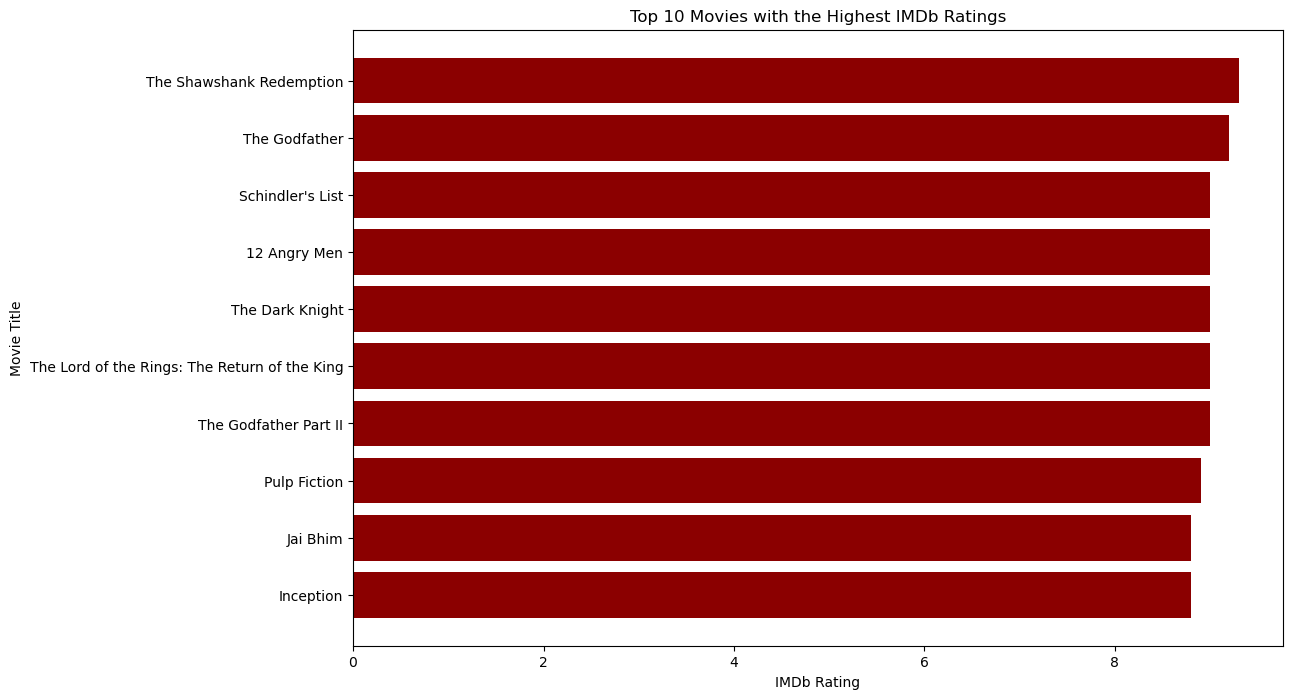

In [12]:
#What are the top 10 movies with the highest IMDb ratings?
top_10_movies = df.sort_values(by='IMDb Rating', ascending=False).head(10)

# Visualization
plt.figure(figsize=(12, 8))
plt.barh(top_10_movies['Title'], top_10_movies['IMDb Rating'], color='darkred')
plt.xlabel('IMDb Rating')
plt.ylabel('Movie Title')
plt.title('Top 10 Movies with the Highest IMDb Ratings')
plt.gca().invert_yaxis()
plt.show()


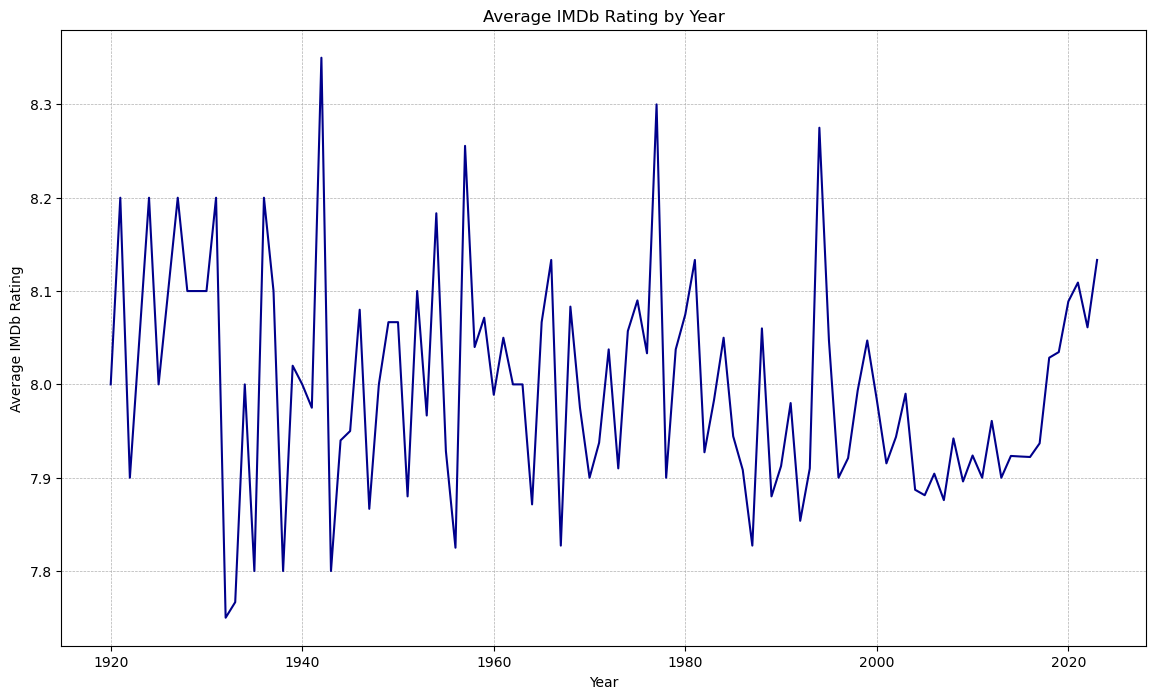

In [14]:
#Which years have produced the highest-rated movies on average?
df['Extracted Year'] = df['Year'].str.extract('(\d+)').astype(float)
yearly_avg_rating = df.groupby('Extracted Year')['IMDb Rating'].mean()

# Visualization
plt.figure(figsize=(14, 8))
yearly_avg_rating.plot(color='darkblue')
plt.xlabel('Year')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Year')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

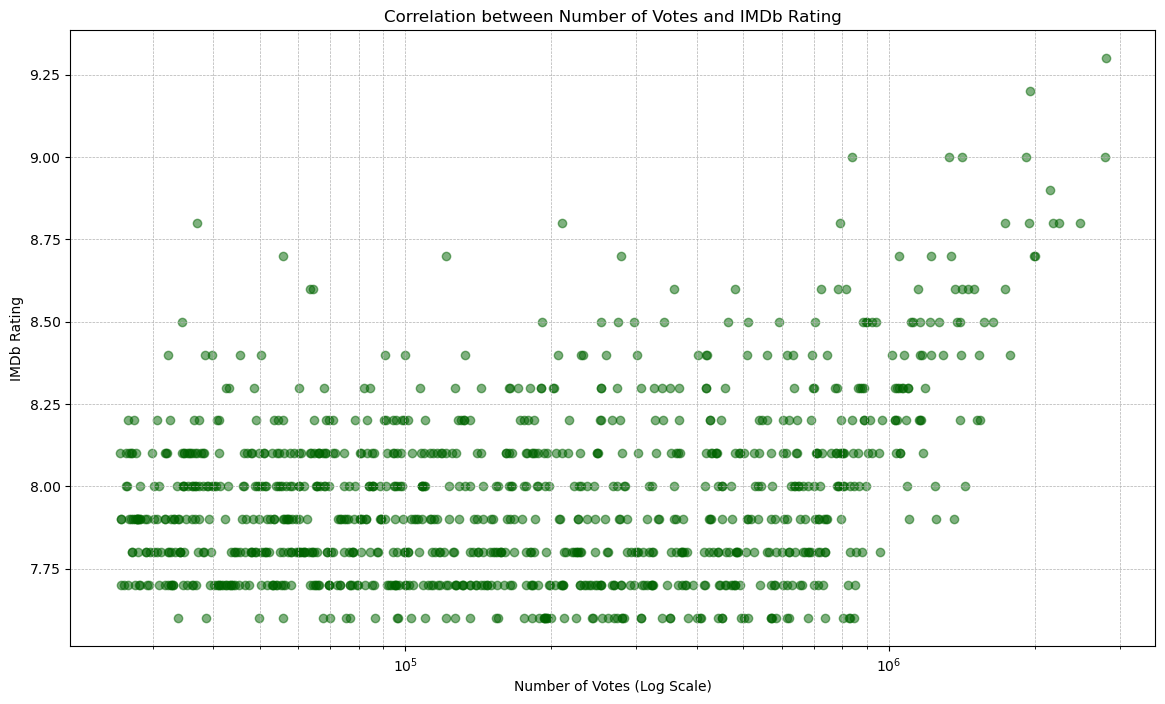

In [16]:
#How does the number of votes correlate with the IMDb rating of movies?
plt.figure(figsize=(14, 8))
plt.scatter(df['Number of Votes'], df['IMDb Rating'], alpha=0.5, color='darkgreen')
plt.xscale('log')
plt.xlabel('Number of Votes (Log Scale)')
plt.ylabel('IMDb Rating')
plt.title('Correlation between Number of Votes and IMDb Rating')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


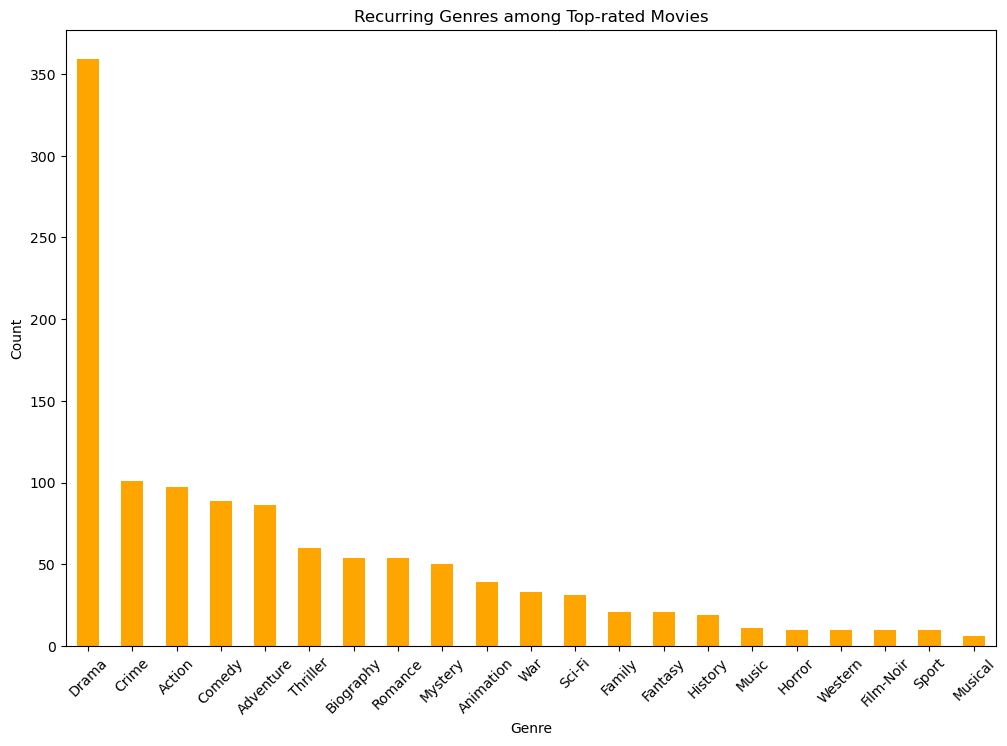

In [17]:
#Are there any recurring themes or genres among the top-rated movies?
# Extracting genres and counting their occurrences among the top-rated movies
genres = df[df['IMDb Rating'] >= 8]['Genre'].str.split(',').explode().str.strip()
genre_counts = genres.value_counts()

# Visualization
plt.figure(figsize=(12, 8))
genre_counts.plot(kind='bar', color='orange')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Recurring Genres among Top-rated Movies')
plt.xticks(rotation=45)
plt.show()


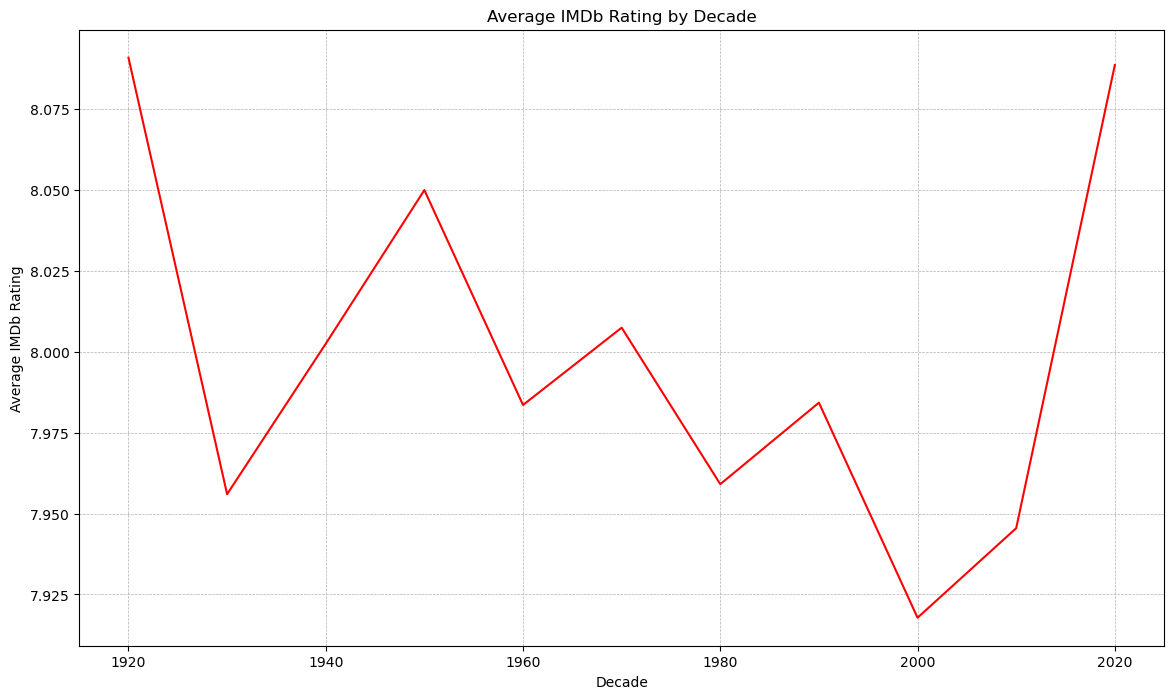

In [18]:
#How has the average rating of the top 1,000 movies changed over the decades?
df['Decade'] = (df['Extracted Year'] // 10) * 10
decade_avg_rating = df.groupby('Decade')['IMDb Rating'].mean()

# Visualization
plt.figure(figsize=(14, 8))
decade_avg_rating.plot(color='red')
plt.xlabel('Decade')
plt.ylabel('Average IMDb Rating')
plt.title('Average IMDb Rating by Decade')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


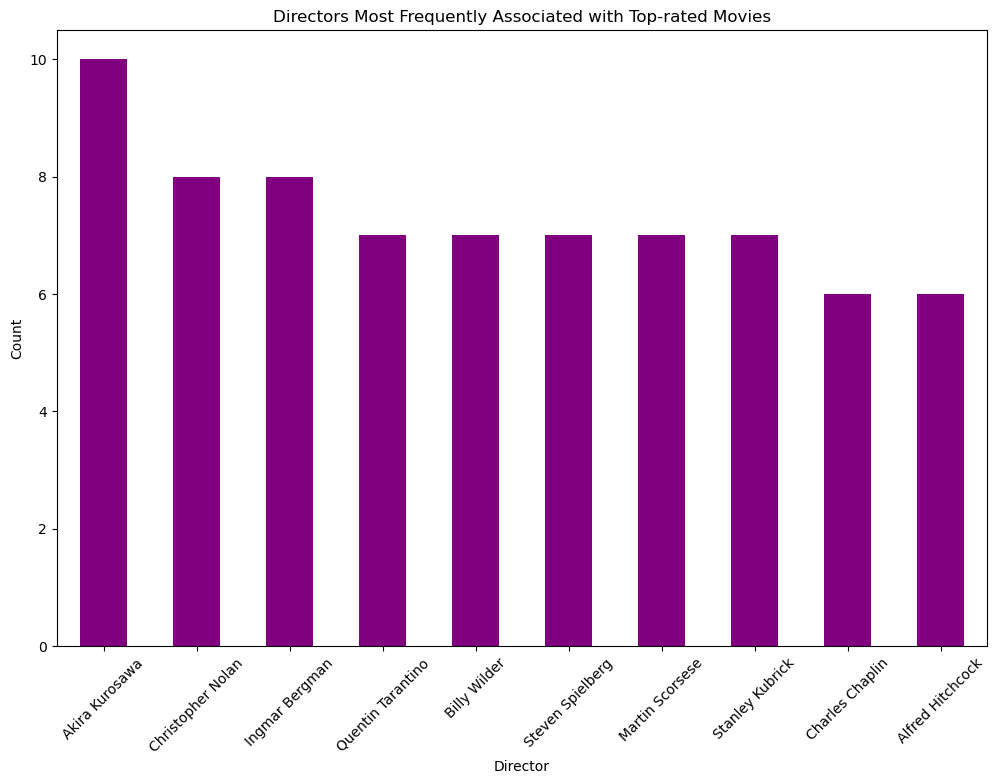

In [19]:
# Which directors or actors are most frequently associated with top-rated movies?
# For directors
directors = df[df['IMDb Rating'] >= 8]['Director'].str.split(',').explode().str.strip()
top_directors = directors.value_counts().head(10)

# Visualization for directors
plt.figure(figsize=(12, 8))
top_directors.plot(kind='bar', color='purple')
plt.xlabel('Director')
plt.ylabel('Count')
plt.title('Directors Most Frequently Associated with Top-rated Movies')
plt.xticks(rotation=45)
plt.show()

# Similar code can be written for actors.
